Anzahl der Filme: 1000


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


🎬 Ähnliche Filme wie 'Inception':



/Users/oyakaragoz/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127912 (\N{ARTIST PALETTE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


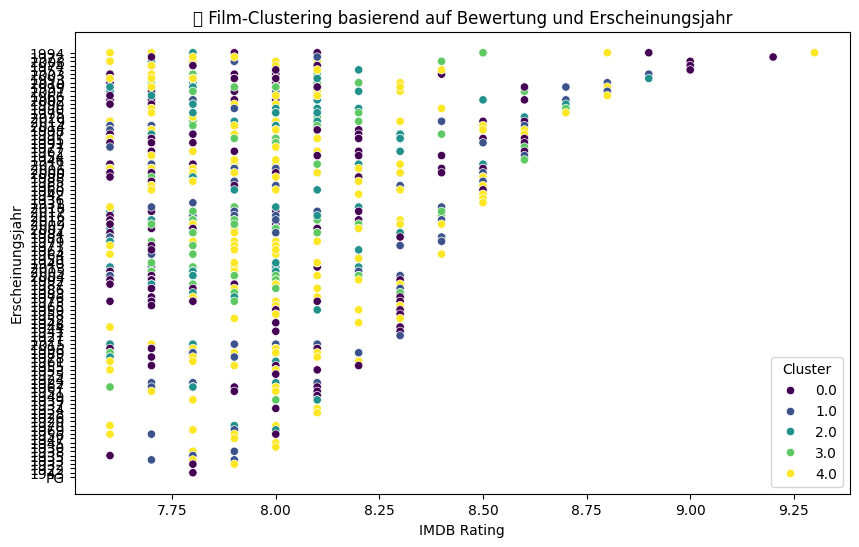

In [10]:
# ==============================================
# 🎥 Movie Recommender mit Clustering
# ==============================================

# 1️⃣ Bibliotheken importieren
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# 2️⃣ Dataset laden
# Lade zuerst die Datei "imdb_top_1000.csv" in dein Projektverzeichnis hoch.
df = pd.read_csv("imdb_top_1000.csv")

# 3️⃣ Überblick anzeigen
print("Anzahl der Filme:", len(df))
df.head()

# 4️⃣ Wichtige Spalten auswählen
features = df[['Genre', 'IMDB_Rating', 'Released_Year', 'Runtime', 'Meta_score']].copy()

# 5️⃣ Daten bereinigen und vorbereiten
# Entferne ' min' aus Runtime und konvertiere erwartete Spalten explizit in numerische Typen
features['Runtime'] = features['Runtime'].str.replace(' min', '', regex=False)
features['Runtime'] = pd.to_numeric(features['Runtime'], errors='coerce')
features['IMDB_Rating'] = pd.to_numeric(features['IMDB_Rating'], errors='coerce')
features['Released_Year'] = pd.to_numeric(features['Released_Year'], errors='coerce')
features['Meta_score'] = pd.to_numeric(features['Meta_score'], errors='coerce')

# Entferne Zeilen mit fehlenden Werten (nach Konvertierung)
features = features.dropna()

# Genre-Spalten als Dummy-Variablen (z. B. Action, Drama, Comedy)
genres = features['Genre'].str.get_dummies(sep=', ')
features = pd.concat([features, genres], axis=1)
features = features.drop('Genre', axis=1)

# 6️⃣ Normalisieren der Daten
scaler = StandardScaler()
# Wähle ausschließlich numerische Spalten für die Skalierung (inkl. Genre-Dummies)
numeric_features = features.select_dtypes(include=['number'])
scaled_features = scaler.fit_transform(numeric_features)

# 7️⃣ Clustering mit K-Means
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(scaled_features)
# Cluster zu den bereinigten 'features' hinzufügen
features['Cluster'] = clusters
# Weise Cluster zurück an das Original-DataFrame per Index (nur für die Zeilen, die wir behalten haben)
df.loc[features.index, 'Cluster'] = features['Cluster'].values

# 8️⃣ Empfehlungsfunktion
def recommend_movie(title):
    movie = df[df['Series_Title'].str.lower() == title.lower()]
    if movie.empty:
        return "❌ Film nicht gefunden. Bitte überprüfe den Titel."
    cluster = movie['Cluster'].values[0]
    similar_movies = df[df['Cluster'] == cluster]

    print(f"🎬 Ähnliche Filme wie '{title}':\n")
    return similar_movies[['Series_Title', 'Genre', 'IMDB_Rating']].sample(5, random_state=42)

# Beispiel:
recommend_movie("Inception")

# 9️⃣ Visualisierung der Cluster
plt.figure(figsize=(10,6))
sns.scatterplot(
    x=df['IMDB_Rating'],
    y=df['Released_Year'],
    hue=df['Cluster'],
    palette='viridis'
)
plt.title('🎨 Film-Clustering basierend auf Bewertung und Erscheinungsjahr')
plt.xlabel('IMDB Rating')
plt.ylabel('Erscheinungsjahr')
plt.show()


Anzahl der Filme: 1000
Numerische Spalten: 25
🎬 Ähnliche Filme wie 'Inception':

                   Series_Title                      Genre  IMDB_Rating
840                 First Blood          Action, Adventure          7.7
529                      Brazil              Drama, Sci-Fi          7.9
719                Frankenstein      Drama, Horror, Sci-Fi          7.8
482            Edge of Tomorrow  Action, Adventure, Sci-Fi          7.9
479  X-Men: Days of Future Past  Action, Adventure, Sci-Fi          7.9


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/oyakaragoz/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127912 (\N{ARTIST PALETTE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/oyakaragoz/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127912 (\N{ARTIST PALETTE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


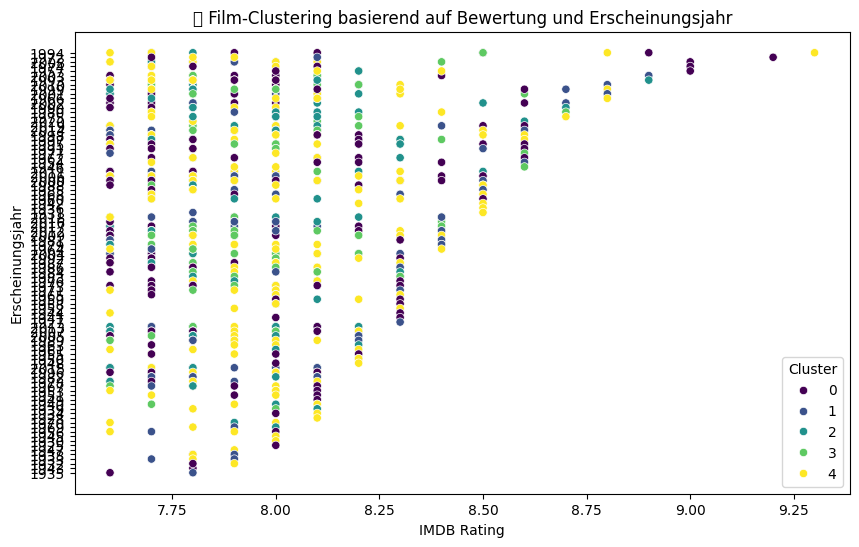

In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset laden
df = pd.read_csv("imdb_top_1000.csv")

print("Anzahl der Filme:", len(df))

# Relevante Spalten auswählen
features = df[['Genre', 'IMDB_Rating', 'Released_Year', 'Runtime', 'Meta_score']].copy()

# 🧹 Daten bereinigen
# Runtime bereinigen
features['Runtime'] = features['Runtime'].str.replace(' min', '', regex=False)
features['Runtime'] = pd.to_numeric(features['Runtime'], errors='coerce')

# Zahlen erzwingen
features['IMDB_Rating'] = pd.to_numeric(features['IMDB_Rating'], errors='coerce')
features['Released_Year'] = pd.to_numeric(features['Released_Year'], errors='coerce')
features['Meta_score'] = pd.to_numeric(features['Meta_score'], errors='coerce')

# Fehlende Werte entfernen
features = features.dropna()

# 🎭 Genres in Dummy-Spalten umwandeln
genres = features['Genre'].str.get_dummies(sep=', ')
features = pd.concat([features.drop('Genre', axis=1), genres], axis=1)

# ✅ Jetzt nur noch numerische Werte drin
print("Numerische Spalten:", features.select_dtypes(include='number').shape[1])

# 🔢 Skalieren
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# 🤖 K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
features['Cluster'] = kmeans.fit_predict(scaled_features)

# Cluster zurück zum Original-Dataset
df = df.loc[features.index]
df['Cluster'] = features['Cluster'].values

# 🎬 Empfehlungsfunktion
def recommend_movie(title):
    movie = df[df['Series_Title'].str.lower() == title.lower()]
    if movie.empty:
        return "❌ Film nicht gefunden. Bitte überprüfe den Titel."
    cluster = movie['Cluster'].values[0]
    similar_movies = df[df['Cluster'] == cluster]
    print(f"🎬 Ähnliche Filme wie '{title}':\n")
    return similar_movies[['Series_Title', 'Genre', 'IMDB_Rating']].sample(5, random_state=42)

# Test
print(recommend_movie("Inception"))

# 🎨 Visualisierung
plt.figure(figsize=(10,6))
sns.scatterplot(
    x=df['IMDB_Rating'],
    y=df['Released_Year'],
    hue=df['Cluster'],
    palette='viridis'
)
plt.title('🎨 Film-Clustering basierend auf Bewertung und Erscheinungsjahr')
plt.xlabel('IMDB Rating')
plt.ylabel('Erscheinungsjahr')
plt.show()
